In [1]:
### 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
### 데이터 불러오기
Raw = pd.read_csv("./data/train_pro_2.csv")
Raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,725,20,RL,86.0,13286,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,320000
1,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970
2,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
3,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
4,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000


In [3]:
# ID 버리기
data = Raw.drop(['Id'],axis=1)


In [4]:
### 데이터 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [5]:
### Object data preprocessing

In [6]:
from sklearn import preprocessing
processed_data = data.copy()

In [7]:
# Object 데이터 preprocessing
# 데이터 응답 중 이미 NA라는 항목이 있어서 Error를 유발함으로 No로 변경
# 동시에 boxplot을 확인하는 함수를 만듬

def object_modifier(name,NA_Fill = True): 
    global processed_data
    le = preprocessing.LabelEncoder()
    
    if (NA_Fill):
        processed_data[name].fillna("NO", inplace = True)
        
    processed_data[name] = le.fit_transform(processed_data[name])

    #processed_data.boxplot(column="SalePrice", by =name)
    #plt.show()

    return list(le.inverse_transform([i for i in range (len(le.classes_))]))


In [8]:
# object인 데이터만 불러서 modifier 실행

classes = {}
for name in processed_data.keys():
    dtype_var = processed_data[name].dtypes
    if (dtype_var == "object"):
        classes[name] = object_modifier(name)
        print(classes[name])
    else:
        continue

['C (all)', 'FV', 'RH', 'RL', 'RM']
['Grvl', 'Pave']
['Grvl', 'NO', 'Pave']
['IR1', 'IR2', 'IR3', 'Reg']
['Bnk', 'HLS', 'Low', 'Lvl']
['AllPub', 'NoSeWa']
['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside']
['Gtl', 'Mod', 'Sev']
['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']
['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe', 'RRNn']
['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn']
['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE']
['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer', 'SLvl']
['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed']
['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl']
['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', '

In [9]:
### 변경된 데이터 확인
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null int64
Alley            1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
Utilities        1460 non-null int64
LotConfig        1460 non-null int64
LandSlope        1460 non-null int64
Neighborhood     1460 non-null int64
Condition1       1460 non-null int64
Condition2       1460 non-null int64
BldgType         1460 non-null int64
HouseStyle       1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null int64
RoofMatl         1460 non-null int64
Exterior1st      1460 non-null int64
Exterior2nd      1460 non-null int64
Mas

In [10]:
### 부족한 feature 체크

#LotFrontage      1201 non-null float64 : 재산과의 직선거리
#MasVnrArea       1452 non-null float64 : 석조 베니어 유형
#GarageYrBlt      1379 non-null float64 : 차고 건설 연도

### feature 하나씩 지우거나 채워나가기

In [11]:
## GarageYrBlt      1379 non-null float64 : 차고 건설 연도
# 다소 비는 항목이 많다.
# 차고 건설 연도는 집의 건설 연도와 유사 할 수있다는 예측
# 차고 건설 연도는 리모델링 건설 연도와 유사 할 수 있다는 예측

print("집 = 차고 :",sum(processed_data["GarageYrBlt"] == processed_data["YearBuilt"]) / len(processed_data["YearBuilt"]))
print("집 = 차고 :",sum(processed_data["GarageYrBlt"] == processed_data["YearBuilt"]))
print("집 = 리모델링 :",sum(processed_data["GarageYrBlt"] == processed_data["YearRemodAdd"]) / len(processed_data["YearRemodAdd"]))
print("집 = 리모델링 :",sum(processed_data["GarageYrBlt"] == processed_data["YearRemodAdd"]))


집 = 차고 : 0.745890410959
집 = 차고 : 1089
집 = 리모델링 : 0.496575342466
집 = 리모델링 : 725


In [12]:
# 약 75%의 확률로 집과 차고의 건설 연도가 같았음
# 81개의 데이터를 손실시키기는 것보다는
# GarageYrBlt의 Na 항목을 YearBuilt와 같은 값으로 넣겠음

processed_data.loc[processed_data['GarageYrBlt'].isnull(),'GarageYrBlt'] = processed_data['YearBuilt']

# 확인
print("집 = 차고 :",sum(processed_data["GarageYrBlt"] == processed_data["YearBuilt"]))

processed_data["GarageYrBlt"].describe()

집 = 차고 : 1170


count    1460.000000
mean     1976.507534
std        26.306739
min      1872.000000
25%      1959.000000
50%      1978.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [13]:
## LotFrontage      1201 non-null float64 : 재산과의 직선거리
# 비는 항목 359개
# 도로에서 집까지의 직선 거리를 나타내는 feature

processed_data["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [14]:
# 중앙값과 평균의 큰 차이가 없음.
# 비는 항목이 너무 많으므로 평균으로 채움
Lot_mean = processed_data["LotFrontage"].mean()
processed_data["LotFrontage"] = processed_data["LotFrontage"].fillna(Lot_mean)

In [15]:
# 확인
processed_data["LotFrontage"].describe()

count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [16]:
## MasVnrArea       1452 non-null float64 : 석조 베니어 유형
# 총 8개 부족하고 원래 object형태의 데이터였음.
# na들  삭제
processed_data = processed_data.dropna(subset = ["MasVnrArea"])

In [17]:
# 확인
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1452 non-null int64
MSZoning         1452 non-null int64
LotFrontage      1452 non-null float64
LotArea          1452 non-null int64
Street           1452 non-null int64
Alley            1452 non-null int64
LotShape         1452 non-null int64
LandContour      1452 non-null int64
Utilities        1452 non-null int64
LotConfig        1452 non-null int64
LandSlope        1452 non-null int64
Neighborhood     1452 non-null int64
Condition1       1452 non-null int64
Condition2       1452 non-null int64
BldgType         1452 non-null int64
HouseStyle       1452 non-null int64
OverallQual      1452 non-null int64
OverallCond      1452 non-null int64
YearBuilt        1452 non-null int64
YearRemodAdd     1452 non-null int64
RoofStyle        1452 non-null int64
RoofMatl         1452 non-null int64
Exterior1st      1452 non-null int64
Exterior2nd      1452 non-null int64
Mas

In [18]:
### feature 별 평균, 분산 보기

import numpy as np
MEAN = []
VARIANCE = []
IDX  = []
for idx in list(processed_data.keys()):
    MEAN.append([processed_data[idx].mean(),idx])
    VARIANCE.append([np.var(processed_data[idx]),idx])
    
    
MEAN.sort()
VARIANCE.sort()
print (VARIANCE)

[[0.00068823091926022053, 'Utilities'], [0.0041151560685745523, 'Street'], [0.01989229257260813, 'PoolQC'], [0.048146282509543219, 'KitchenAbvGr'], [0.057259294674771748, 'BsmtHalfBath'], [0.061146305276658389, 'CentralAir'], [0.061936039584424264, 'Alley'], [0.067424811602121881, 'Condition2'], [0.076650710713445494, 'LandSlope'], [0.087510624653750091, 'Heating'], [0.1391009076489918, 'MiscFeature'], [0.24767775425175872, 'PavedDrive'], [0.25249679363127897, 'HalfBath'], [0.26894935455228469, 'BsmtFullBath'], [0.30254602751785326, 'FullBath'], [0.3606519742883379, 'RoofMatl'], [0.39284657241080978, 'MSZoning'], [0.41370646737851852, 'Fireplaces'], [0.47808475438077241, 'ExterQual'], [0.5029307917643755, 'LandContour'], [0.52235114101192237, 'Foundation'], [0.53773032731522585, 'ExterCond'], [0.55985996326905418, 'GarageCars'], [0.64707366679568046, 'GarageCond'], [0.66346172089034594, 'BedroomAbvGr'], [0.6879363697075942, 'KitchenQual'], [0.69802979077021166, 'RoofStyle'], [0.7579495

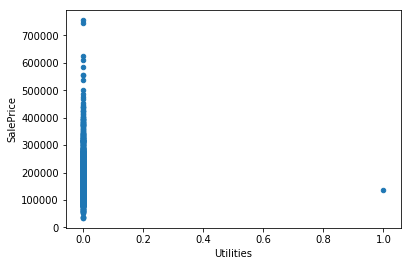

Utilities '1' :  1


In [19]:
### [0.00068870523415977963, 'Utilities']
## Utilities의 분산, 평균이 낮은 것을 확인
# 데이터의 형태를 확인해보자

processed_data.plot.scatter(x="Utilities", y="SalePrice")
plt.show()

print("Utilities '1' : ",sum(processed_data["Utilities"]))

In [20]:
## Utilities 항목은 사실상 의미 없다고 봐야할 듯
processed_data = processed_data.drop(["Utilities"], axis=1)

In [21]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1452 non-null int64
MSZoning         1452 non-null int64
LotFrontage      1452 non-null float64
LotArea          1452 non-null int64
Street           1452 non-null int64
Alley            1452 non-null int64
LotShape         1452 non-null int64
LandContour      1452 non-null int64
LotConfig        1452 non-null int64
LandSlope        1452 non-null int64
Neighborhood     1452 non-null int64
Condition1       1452 non-null int64
Condition2       1452 non-null int64
BldgType         1452 non-null int64
HouseStyle       1452 non-null int64
OverallQual      1452 non-null int64
OverallCond      1452 non-null int64
YearBuilt        1452 non-null int64
YearRemodAdd     1452 non-null int64
RoofStyle        1452 non-null int64
RoofMatl         1452 non-null int64
Exterior1st      1452 non-null int64
Exterior2nd      1452 non-null int64
MasVnrType       1452 non-null int64
Mas

In [22]:
### float, int type feature scatter 그려보기
### object type이 아닌 feature 뽑아내기
## processed_data는 다 object형태가 아님으로 따로 data copy

from sklearn import preprocessing
scatter_data = data.copy()

names = []
for name in scatter_data.keys():
    dtype_var = scatter_data[name].dtypes
    if dtype_var != "object":
        names.append(name)
        
print(names)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'FlrSF1st', 'FlrSF2nd', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SsnPorch3', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [23]:
## scatter 함수

def scatter_plot(name):
    scatter_data.plot.scatter(x=name, y="SalePrice")
    plt.show()

In [24]:
### scatter 함수 loop

#for name in names:
#    scatter_plot(name)

In [25]:
### correlation보기

processed_corr = processed_data.corr()
processed_corr

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.037811,-0.355296,-0.138054,-0.024935,0.096078,0.121629,-0.002560,0.074386,-0.025999,...,0.008214,-0.005153,0.087128,-0.047199,-0.007805,-0.013840,-0.021529,0.012660,-0.025716,-0.082813
MSZoning,0.037811,1.000000,-0.109234,-0.036493,0.089042,-0.365002,0.063042,-0.015891,-0.011440,-0.023846,...,-0.003633,0.003348,-0.058844,-0.006891,0.008792,-0.024541,-0.021621,0.094962,0.015077,-0.168018
LotFrontage,-0.355296,-0.109234,1.000000,0.306908,-0.037458,-0.061151,-0.148517,-0.076077,-0.180650,0.067942,...,0.181341,-0.192124,-0.037197,0.009373,0.001236,0.009508,0.007682,-0.030105,0.057812,0.333322
LotArea,-0.138054,-0.036493,0.306908,1.000000,-0.197573,-0.028196,-0.164425,-0.149712,-0.119258,0.437985,...,0.077888,-0.065354,0.035682,0.106527,0.038226,0.003203,-0.012977,0.011876,0.036995,0.264674
Street,-0.024935,0.089042,-0.037458,-0.197573,1.000000,-0.001783,-0.010327,0.115917,0.013972,-0.179307,...,0.004437,-0.004089,-0.029565,-0.160700,-0.022703,0.003617,-0.025113,0.014416,0.005963,0.040982
Alley,0.096078,-0.365002,-0.061151,-0.028196,-0.001783,1.000000,-0.038478,0.022483,-0.009916,0.016260,...,0.001906,-0.001757,0.043416,-0.054198,-0.013704,-0.016220,0.016986,0.003819,-0.003303,0.083215
LotShape,0.121629,0.063042,-0.148517,-0.164425,-0.010327,-0.038478,1.000000,0.085289,0.220989,-0.099940,...,-0.020018,0.018124,-0.046324,-0.007886,-0.042060,-0.033983,0.034631,-0.001181,-0.040352,-0.259613
LandContour,-0.002560,-0.015891,-0.076077,-0.149712,0.115917,0.022483,0.085289,1.000000,-0.025711,-0.374030,...,-0.012983,0.000621,-0.044604,0.011995,0.021070,-0.012088,0.020479,-0.025496,0.033334,0.014312
LotConfig,0.074386,-0.011440,-0.180650,-0.119258,0.013972,-0.009916,0.220989,-0.025711,1.000000,-0.007194,...,-0.046890,0.054899,0.058079,-0.015795,-0.018442,0.020197,-0.006715,0.013687,0.050598,-0.069880
LandSlope,-0.025999,-0.023846,0.067942,0.437985,-0.179307,0.016260,-0.099940,-0.374030,-0.007194,1.000000,...,-0.015593,0.014370,0.048867,0.051158,-0.003628,0.007416,-0.002254,0.054718,-0.042796,0.052276


In [26]:
# SalePrice 기준으로 정렬

pd.set_option('display.height',100)
processed_corr["SalePrice"].sort_values(ascending = False)


height has been deprecated.



SalePrice        1.000000
OverallQual      0.789997
GrLivArea        0.710080
GarageCars       0.639686
GarageArea       0.622492
TotalBsmtSF      0.612971
FlrSF1st         0.606849
FullBath         0.562491
TotRmsAbvGrd     0.536311
YearBuilt        0.522896
GarageYrBlt      0.507855
YearRemodAdd     0.507158
MasVnrArea       0.477493
Fireplaces       0.468930
BsmtFinSF1       0.383977
Foundation       0.381790
LotFrontage      0.333322
WoodDeckSF       0.324650
FlrSF2nd         0.322710
OpenPorchSF      0.311268
HalfBath         0.282040
LotArea          0.264674
CentralAir       0.251545
GarageCond       0.246790
Electrical       0.237049
PavedDrive       0.231384
RoofStyle        0.225358
BsmtFullBath     0.225027
BsmtUnfSF        0.215740
SaleCondition    0.211680
Neighborhood     0.211506
GarageQual       0.205773
HouseStyle       0.181810
BedroomAbvGr     0.171934
Fence            0.139615
RoofMatl         0.133503
Functional       0.117358
ExterCond        0.116490
ScreenPorch 

In [27]:
### Feature Engineering

In [28]:
## Make New Feature

In [29]:
processed_data["CarsAndArea"] = processed_data["GarageCars"] * processed_data["GarageArea"]
processed_data["Whole_Porch"] = processed_data["WoodDeckSF"] + processed_data["OpenPorchSF"]
processed_data["Whole_Bath"] = processed_data["BsmtFullBath"] + processed_data["FullBath"]

In [30]:
## Delete Feature

In [31]:
processed_data = processed_data.drop(["RoofStyle","RoofMatl",
                                     "Exterior1st","Exterior2nd","MasVnrType","MasVnrArea","ExterCond",
                                     "Foundation",
                                     "BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF",
                                     "Heating","CentralAir",
                                     "Electrical",
                                     "FlrSF1st","FlrSF2nd","LowQualFinSF","TotRmsAbvGrd",
                                     "BsmtFullBath","BsmtHalfBath","FullBath","HalfBath",
                                     "BedroomAbvGr",
                                     "KitchenAbvGr",
                                     "Functional",
                                     "Fireplaces","FireplaceQu",
                                     "GarageType","GarageYrBlt","GarageFinish","GarageCars","GarageArea","GarageQual","GarageCond",
                                     "PavedDrive",
                                     "WoodDeckSF","OpenPorchSF","EnclosedPorch","SsnPorch3","ScreenPorch",
                                     "PoolArea","PoolQC",
                                     "Fence",
                                     "MiscFeature","MiscVal",
                                     "MSSubClass","LotFrontage","Street","Alley","LotShape","LandContour","LotConfig","LandSlope",
                                     "Condition1","Condition2","HouseStyle","BldgType",
                                     "HouseStyle",
                                     "YearRemodAdd",
                                     "MoSold","YrSold",
                                     "SaleType","SaleCondition"],axis=1)

In [32]:
type(processed_data)

pandas.core.frame.DataFrame

In [33]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 16 columns):
MSZoning        1452 non-null int64
LotArea         1452 non-null int64
Neighborhood    1452 non-null int64
OverallQual     1452 non-null int64
OverallCond     1452 non-null int64
YearBuilt       1452 non-null int64
ExterQual       1452 non-null int64
BsmtQual        1452 non-null int64
TotalBsmtSF     1452 non-null int64
HeatingQC       1452 non-null int64
GrLivArea       1452 non-null int64
KitchenQual     1452 non-null int64
SalePrice       1452 non-null int64
CarsAndArea     1452 non-null int64
Whole_Porch     1452 non-null int64
Whole_Bath      1452 non-null int64
dtypes: int64(16)
memory usage: 192.8 KB


In [34]:
processed_corr = processed_data.corr()

In [35]:
processed_corr["SalePrice"].sort_values(ascending = False)

SalePrice       1.000000
OverallQual     0.789997
GrLivArea       0.710080
CarsAndArea     0.678842
TotalBsmtSF     0.612971
Whole_Bath      0.583707
YearBuilt       0.522896
Whole_Porch     0.422168
LotArea         0.264674
Neighborhood    0.211506
OverallCond    -0.076294
MSZoning       -0.168018
HeatingQC      -0.400075
KitchenQual    -0.586597
BsmtQual       -0.592286
ExterQual      -0.633635
Name: SalePrice, dtype: float64

In [36]:
### 데이터 확인
pd.set_option('display.max_columns',1000)
#pd.set_option('display.height',1000)

processed_data.head()

,MSZoning,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,ExterQual,BsmtQual,TotalBsmtSF,HeatingQC,GrLivArea,KitchenQual,SalePrice,CarsAndArea,Whole_Porch,Whole_Bath
0,3,13286,7,9,5,2007,0,0,1698,0,1698,0,320000,2304,391,3
1,3,19690,7,6,7,1966,2,2,697,4,2201,2,274970,864,822,2
2,3,15623,15,10,5,1996,2,0,2396,0,4476,0,745000,2439,249,4
3,3,21535,15,10,6,1994,0,0,2444,0,4316,0,755000,2496,432,3
4,3,35760,15,10,5,1995,2,0,1930,0,3627,2,625000,2421,437,4


In [37]:
### R2, VIF 보기
## Feature_selection 파일에 근거 기록

# 추가로 vif 코드 실행에 있어서 feature 이름의 첫 글자가
# 숫자인 경우 코드 오류로 인해 변경함.

In [38]:
import statsmodels.api as sm

X = processed_data.drop(["SalePrice"],axis=1).values
y = processed_data['SalePrice'].values

X2 = sm.add_constant(X)
est = sm.OLS(y,X2)
est2 = est.fit()
print(est2.summary())

/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     419.3
Date:                Thu, 12 Apr 2018   Prob (F-statistic):               0.00
Time:                        10:13:59   Log-Likelihood:                -17218.
No. Observations:                1452   AIC:                         3.447e+04
Df Residuals:                    1436   BIC:                         3.455e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.297e+05   9.73e+04     -5.444      0.0

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

vif = pd.DataFrame()
X = processed_data.drop(["SalePrice"],axis=1)
features = "+".join(X.columns)


X["SalePrice"] = processed_data["SalePrice"] 

reg_y, reg_x = dmatrices('SalePrice ~'+features, X, return_type="dataframe")
vif["vif"] = [variance_inflation_factor(reg_x.values,i) for i in range(reg_x.shape[1])]

vif["feature"] = reg_x.columns

sorted_vif = vif.sort_values(by=["vif"],ascending=False)

pd.set_option('display.max_columns',1000)
pd.set_option('display.height',1000)

sorted_vif


height has been deprecated.



,vif,feature
0,11643.068336,Intercept
4,3.154873,OverallQual
6,2.618538,YearBuilt
7,2.341790,ExterQual
11,2.159174,GrLivArea
8,2.147048,BsmtQual
13,1.933006,CarsAndArea
12,1.879755,KitchenQual
15,1.788245,Whole_Bath
9,1.720051,TotalBsmtSF


In [40]:
### Model

In [41]:
from sklearn import cross_validation

X = processed_data.drop(['SalePrice'], axis=1).values
y = processed_data['SalePrice'].values

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

lin_reg.score(X_test, y_test)



0.75620187319991927